# <font color=black>Entrainer, régler et valider un algorithme de regression avec la bonne méthodologie </font>

Pour ce Notebook, nous allons utiliser le célèbre jeu de données `BOSTON`. 
Il s’agit de prédire le prix de biens immobiliers en fonction d’informations concernant l’environnement. Il s’agit donc d’un problème de régression.
Pour plus d'information : [boston](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

# <font color=blue>Entrainement et evaluation d'un modèle de regression </font>

Pour commencer on doit  charger les bibliothèques necessaires:

In [2]:
#Chargement des bibliothèques
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [48]:
boston=pd.read_csv('boston.csv')

In [5]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [6]:
# afficher les noms des variables (“feature”)
boston.columns


Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

# Régression linéaire simple

## $$f(X)=aX+b $$

In [7]:
# Dans un premier temps on va essayer d'estimer le prix d'une maison 
#en utilisant une seule variable soit 'RM'
x=boston[['RM']]
y=boston[['MEDV']]
print(x.shape)
print(y.shape)

(506, 1)
(506, 1)


Maintenant il est temps d’entrainer un modèle machine learning. Pour faire simple, nous allons commencer avec l'un des modèles de regression le plus simple, ici en occurence le LinearRegression. 

In [30]:
# chargement du modèle LinearRegression 

from sklearn.linear_model import LinearRegression

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

### Créer une instance  `linreg1 ` de la classe  `LinearRegression `

In [12]:
linreg1 =LinearRegression()

### Entrainer  `linreg1 ` avec les sous-ensembles d'apprentissage puis caluler le test_score de  `linreg1 `

le score de test 44.43994949927361 %
le score de train 49.25506855496909 %


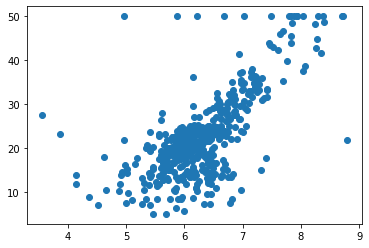

In [16]:
# Entrainer le modèle avec la méthode fit
linreg1.fit(x_train,y_train)
print('le score de test',linreg1.score(x_test,y_test)*100,"%")
print('le score de train',linreg1.score(x_train,y_train)*100,"%")
plt.scatter(x,y)


### Aficcher l'intercept de `linreg1 `

In [17]:
linreg1.intercept_

array([-33.7350011])

### Afficher les coefficients de `linreg1 `

In [18]:
linreg1.coef_

array([[8.93363949]])

### Les metriques d'un algorithme de regression
$$ R2 =1- \frac{\sum  (y_{vrai} - y_{pred} )^2}{\sum  (y_{vrai} - \overline{ y_{vrai}} )^2}  $$
$$ MAE = \frac{1}{m} \sum \lvert y_{vrai} - y_{pred} \rvert $$
$$ MSE = \frac{1}{m} \sum  (y_{vrai} - y_{pred} )^2 $$
$$ RMSE = \sqrt {\frac{1}{m} \sum  (y_{vrai} - y_{pred} )^2 }$$
$$MedianAE =median{\lvert y_{vrai} - y_{pred} \rvert} $$

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
y_pred = linreg1.predict(x_test)
print('test_score = ',linreg1.score(x_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MSE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))

test_score =  0.4443994949927361
R2 =  0.4443994949927361
MSE =  51.60929995125552
RMSE =  7.18396129939851
MAE =  4.574004070859053
Meadian =  2.438176577236251


# Régression linéaire multiple

## $$f(X_1,X_2,...)= a_0 + a_1*X_1 + a_2*X_2 + .... + a_{12}*X12$$

In [23]:
x=boston.drop('MEDV',axis=1)
y=boston[['MEDV']]
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

(506, 12)
(506, 1)


### Régression linéaire multiple (toutes les variables de Boston)   avec les valeurs par defauts de `LinearRegression`

In [25]:
 #créer une instance
###x.columns
linreg2=LinearRegression()

 #entrainer le modèle
linreg2.fit(x_train,y_train)
print('le score de test',linreg2.score(x_test,y_test)*100,"%")
print('le score de train',linreg2.score(x_train,y_train)*100,"%")


le score de test 71.80994994559333 %
le score de train 73.57497242503399 %


### Régression linéaire multiple (toutes les variables de Boston)  avec `fit_intercept= False` et `normalize=True`

In [31]:
linreg3 = LinearRegression(fit_intercept= False, normalize=True)#normalize standarscaler(),fit intercept a0=0
linreg3.fit(x_train,y_train)
print('le score de test',linreg3.score(x_test,y_test)*100,"%")
print('le score de train',linreg3.score(x_train,y_train)*100,"%")
#LinearRegression?
y_pred = linreg3.predict(x_test)
print('test_score = ',linreg3.score(x_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MSE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))


le score de test 67.91317160133855 %
le score de train 69.76477467285143 %
test_score =  0.6791317160133854
R2 =  0.6791317160133854
MSE =  29.805206013794617
RMSE =  5.4594144387282615
MAE =  3.379571800929954
Meadian =  2.010562003511698


# Sélection de variables

### Diviser la base de données en deux tableaux $X$ (tableau d'observations) et $y$ (la variable cible)

In [38]:
# Define the X (input) and y (target) features
x=boston.drop('MEDV',axis=1)
y=boston[['MEDV']]
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)


(506, 12)
(506, 1)


## Normaliser $X$

In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [50]:
#sc = MinMaxScaler()
#sc = StandardScaler()
sc = RobustScaler()
X_sc = sc.fit_transform(x)
X = pd.DataFrame(X_sc, columns=x.columns)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,-0.602699


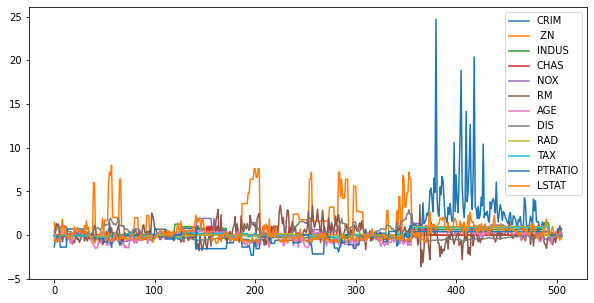

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(X)
plt.legend(x.columns)
plt.show()

In [52]:
# Variance de chaque variable
X.var()

CRIM       5.724612
 ZN        3.481196
INDUS      0.282384
CHAS       0.064513
NOX        0.438453
RM         0.906410
AGE        0.329339
DIS        0.464914
RAD        0.189541
TAX        0.189657
PTRATIO    0.597830
LSTAT      0.509438
dtype: float64

In [53]:
#division X_train,X_test,y_train,y_test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [54]:
 #Perform feature selection using a variance threshold
#from sklearn.feature_selection import VarianceThreshold
#VarianceThreshold?

In [55]:
# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.5))
sel.fit(x_train)

print("Sélection de variables :", sel.get_support())
print("Variables sélectionnées :", list(X.columns[sel.get_support()]))
print("Variables supprimées :", list(X.columns[~sel.get_support()]))

Sélection de variables : [ True  True False False False  True False False False False  True  True]
Variables sélectionnées : ['CRIM', ' ZN ', 'RM', 'PTRATIO', 'LSTAT']
Variables supprimées : ['INDUS ', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX']


In [56]:
# Suppression de variables à faible variance
X_train = sel.transform(x_train)
X_test = sel.transform(x_test)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
y_pred = model.predict(X_test)
print('test_score = ',model.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MSE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))

test_score =  0.6748123792893399
R2 =  0.6748123792893399
MSE =  30.206425851740644
RMSE =  5.4960372862400275
MAE =  3.503958526400302
Meadian =  2.3982011911682584


## Selection de variables avec `SelectKBest`

In [18]:
#division X_train,X_test,y_train,y_test

In [64]:
x=boston.drop('MEDV',axis=1)
y=boston[['MEDV']]
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
sc = StandardScaler()
X_sc = sc.fit_transform(x)
X = pd.DataFrame(X_sc, columns=x.columns)
X.head()


(506, 12)
(506, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501


In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif      
from sklearn.feature_selection import f_regression  

kbest = SelectKBest(score_func=f_regression, k=8)
kbest.fit(x_train, y_train)

print("Sélection de variables :", kbest.get_support())
print("Scores de variables :", kbest.scores_)
print("Variables sélectionnées:", list(x.columns[kbest.get_support()]))
print("Variables supprimées :", list(x.columns[~kbest.get_support()]))

Sélection de variables : [ True False  True False  True  True False False  True  True  True  True]
Scores de variables : [ 79.65821839  51.3295589  129.48134206  17.31841687  89.04604138
 390.19734573  64.13947456  26.27435426  82.45899189 132.93154423
 143.25892109 462.17714276]
Variables sélectionnées: ['CRIM', 'INDUS ', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
Variables supprimées : [' ZN ', 'CHAS', 'AGE', 'DIS']


C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [68]:
X_train = kbest.transform(x_train)
X_test = kbest.transform(x_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('test_score = ',model.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MSE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))



test_score =  0.6855360292143352
R2 =  0.6855360292143352
MSE =  29.210314328148506
RMSE =  5.404656726208289
MAE =  3.4675282190254717
Meadian =  2.3122288191583102


## Supprimer les variables fortement corrélées

In [69]:
#division X_train,X_test,y_train,y_test
x=boston.drop('MEDV',axis=1)
y=boston[['MEDV']]
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
sc = StandardScaler()
X_sc = sc.fit_transform(x)
X = pd.DataFrame(X_sc, columns=x.columns)
X.head()


(506, 12)
(506, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501


In [78]:
x_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,-0.205195,0.426618,-0.045982,0.429440,-0.242419,0.363703,-0.391727,0.633948,0.591113,0.298431,0.482907
ZN,-0.205195,1.000000,-0.521041,-0.029101,-0.510986,0.284054,-0.562212,0.674285,-0.315041,-0.305830,-0.377158,-0.400026
INDUS,0.426618,-0.521041,1.000000,0.068194,0.766586,-0.381478,0.643167,-0.700065,0.620850,0.745065,0.379649,0.612088
CHAS,-0.045982,-0.029101,0.068194,1.000000,0.113718,0.147985,0.081803,-0.090187,0.017944,-0.010361,-0.118626,-0.077014
NOX,0.429440,-0.510986,0.766586,0.113718,1.000000,-0.297498,0.732916,-0.769903,0.620102,0.669589,0.186440,0.592362
RM,-0.242419,0.284054,-0.381478,0.147985,-0.297498,1.000000,-0.227922,0.195834,-0.240947,-0.314970,-0.351499,-0.619522
AGE,0.363703,-0.562212,0.643167,0.081803,0.732916,-0.227922,1.000000,-0.762096,0.462899,0.505121,0.249802,0.597940
DIS,-0.391727,0.674285,-0.700065,-0.090187,-0.769903,0.195834,-0.762096,1.000000,-0.501121,-0.531960,-0.215367,-0.510049
RAD,0.633948,-0.315041,0.620850,0.017944,0.620102,-0.240947,0.462899,-0.501121,1.000000,0.911198,0.473095,0.510711
TAX,0.591113,-0.305830,0.745065,-0.010361,0.669589,-0.314970,0.505121,-0.531960,0.911198,1.000000,0.462434,0.569035


In [79]:
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

In [80]:
cf = correlatedFeatures(x_train, 0.7)
cf

{'AGE', 'DIS', 'NOX', 'TAX'}

In [82]:
X_train = x_train.drop(cf, axis=1)
X_test = x_test.drop(cf, axis=1)
print(X_train.shape)
print(X_test.shape)

(404, 8)
(102, 8)


In [83]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('test_score = ',model.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MSE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))




test_score =  0.6823678140975352
R2 =  0.6823678140975352
MSE =  29.504607372880162
RMSE =  5.431814372093377
MAE =  3.5570565918714605
Meadian =  2.3354758107277824


## Sélection de variables avec Recursive Feature Elimination (RFE)

In [30]:
#division X_train,X_test,y_train,y_test

In [88]:
x=boston.drop('MEDV',axis=1)
y=boston[['MEDV']]
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
sc = StandardScaler()
X_sc = sc.fit_transform(x)
X = pd.DataFrame(X_sc, columns=x.columns)
X.head()


(506, 12)
(506, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=8)
rfe.fit(x_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(x.columns[rfe.support_]))

Sélection de variables [ True False False  True  True  True False  True  True False  True  True]
Classement de variables [1 2 5 1 1 1 4 1 1 3 1 1]
Variables sélectionnées : ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']


In [92]:
X_train = rfe.transform(x_train)
X_test = rfe.transform(x_test)
print(X_train.shape)
print(X_test.shape)

(404, 8)
(102, 8)


In [93]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('test_score = ',model.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MSE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))







test_score =  0.7164096172091483
R2 =  0.7164096172091483
MSE =  26.342490686816575
RMSE =  5.132493612934805
MAE =  3.4122240766956393
Meadian =  2.4834411088594113
